In [156]:
import pandas as pd
from datetime import datetime

In [157]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep = ';')

In [158]:
taxi.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type             start_at     start_lat     start_lon  \
0  executive       asap  2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap  2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap  2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap  2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved  2010-09-11 23:55:00  -12,08995438  -76,92626953   

                end_at       end_lat       end_lon  end_state  \
0  2010-11-16 17:29:00  -12,05537033   -77,0413208   drop off   
1  2010-06-01 00:37:00  -12,12465668  -77,02886963  not found   
2  2010-05-31 05:04:00  -12,13883209  -76,99530029  not found   
3  2010-06-01 00:32:00  -12,12458801  -77,02896118  not found   
4  2010-09-12 01:07:00  -12,02223206  -77,10638428   drop off   

  driver_start_lat driver_start_lon           arrived_at  source  \
0     -12,10825481      -77,0272739  2010-11-16 17:02:00  iPhone   
1              NaN              NaN                  NaN  iPhone   
2              NaN              NaN                  NaN  iPhone   
3              NaN              NaN                  NaN  iPhone   
4     -12,08311558      -76,9277072  2010-09-11 23:50:00  iPhone   

   driver_score  rider_score  
0           5.0          5.0  
1           NaN          NaN  
2           NaN          NaN  
3           NaN          NaN  
4           4.0          5.0

In [159]:
taxi[['start_at','end_at','arrived_at']] = taxi[['start_at','end_at','arrived_at']].apply(pd.to_datetime)

In [160]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

In [161]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [162]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [163]:
taxi

journey_id                           user_id  \
0      23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1      dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2      dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3      dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4      85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   
...                                 ...                               ...   
23106  4a18ea5737ce0ffecaf20b305a0e2c86  8998bb370b5f0cec43a373adebba0c72   
23107  f1e4317f2c17991dd90d1cd17ae0d399  5f8a6ffef0ea5df78a8ee890267b60ec   
23108  1e44c0fd0a266c3719ff30410b257bce  c0ffb6f6cd801004dd8609c12277c2d1   
23109  7073883383b89ad289e864022150cdd7  c0ffb6f6cd801004dd8609c12277c2d1   
23110  b7dea45c3cc92b9efd5a4905e69ff9bf  c0ffb6f6cd801004dd8609c12277c2d1   

                              driver_id                           taxi_id  \
0      583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                               NaN   
4      d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   
...                                 ...                               ...   
23106  d665fb9f75ef5d9cd0fd89479380ba78  16cbe35db7fff70fbc8251b4cda9fdc9   
23107  17c21284245ff240c7212732991c2373  716a697375634f32a06d692b0448f13d   
23108  4851ee4c867c9b49b909c1adb76c31e9  4851ee4c867c9b49b909c1adb76c538e   
23109  56f59b58bcbbd1cdabc3652e713134c2  924d4f0e7554566623e8ebb3904a7b0c   
23110  924d4f0e7554566623e8ebb390491d08  924d4f0e7554566623e8ebb390491492   

            icon start_type            start_at     start_lat     start_lon  \
0      executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1      executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2      executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3      executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4      executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   
...          ...        ...                 ...           ...           ...   
23106  executive   reserved 2010-07-31 13:15:00  -12,08974075  -77,04699707   
23107  executive       asap 2010-10-02 05:26:00  -12,09253011  -77,02875271   
23108  executive       asap 2010-09-21 09:56:00   -12,1275637  -77,02642288   
23109  executive   reserved 2010-04-29 04:30:00    -12,019468   -77,1077669   
23110  executive       asap 2010-03-16 19:58:00   -12,1334974   -77,0272581   

                   end_at       end_lat       end_lon     end_state  \
0     2010-11-16 17:29:00  -12,05537033   -77,0413208      drop off   
1     2010-06-01 00:37:00  -12,12465668  -77,02886963     not found   
2     2010-05-31 05:04:00  -12,13883209  -76,99530029     not found   
3     2010-06-01 00:32:00  -12,12458801  -77,02896118     not found   
4     2010-09-12 01:07:00  -12,02223206  -77,10638428      drop off   
...                   ...           ...           ...           ...   
23106 2010-07-31 13:27:00  -12,08352661  -77,05044556      drop off   
23107 2010-10-02 05:56:00  -12,07776001  -77,05623798      drop off   
23108 2010-09-21 10:18:00  -12,10529838  -77,04735249      drop off   
23109 2010-04-29 05:11:00  -12,09909987  -77,03475013      drop off   
23110 2010-03-16 20:02:00    -12,029174     -76,93977  rider cancel   

      driver_start_lat driver_start_lon          arrived_at   source  \
0         -12,10825481      -77,0272739 2010-11-16 17:02:00   iPhone   
1                  NaN              NaN                 NaT   iPhone   
2                  NaN              NaN                 NaT   iPhone   
3                  NaN              NaN                 NaT   iPhone   
4         -12,083

In [164]:
a = taxi.query('start_type == "reserved" and wait_time > 0').groupby('driver_id')['icon'].count().idxmax()

In [165]:
a

'406921adcca37705ef527b4246c0cfea'

In [166]:
taxi['month'] = taxi.start_at.apply(lambda x: int(x.strftime("%m")))

In [167]:
taxi['weekday'] = taxi.start_at.apply(lambda x: x.strftime("%A"))

In [168]:
taxi.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at     start_lat     start_lon  \
0  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   

               end_at  ...  end_state driver_start_lat driver_start_lon  \
0 2010-11-16 17:29:00  ...   drop off     -12,10825481      -77,0272739   
1 2010-06-01 00:37:00  ...  not found              NaN              NaN   
2 2010-05-31 05:04:00  ...  not found              NaN              NaN   
3 2010-06-01 00:32:00  ...  not found              NaN              NaN   
4 2010-09-12 01:07:00  ...   drop off     -12,08311558      -76,9277072   

           arrived_at  source driver_score rider_score  wait_time  month  \
0 2010-11-16 17:02:00  iPhone          5.0         5.0       18.0     11   
1                 NaT  iPhone          NaN         NaN        NaN      6   
2                 NaT  iPhone          NaN         NaN        NaN      5   
3                 NaT  iPhone          NaN         NaN        NaN      6   
4 2010-09-11 23:50:00  iPhone          4.0         5.0       -5.0      9   

    weekday  
0   Tuesday  
1   Tuesday  
2    Monday  
3   Tuesday  
4  Saturday  

[5 rows x 22 columns]

In [169]:
import seaborn as sns

In [170]:
a = sns.countplot(x="month", data=taxi)

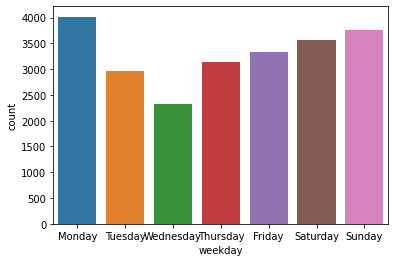

In [171]:
b = sns.countplot(data = taxi, x = 'weekday', order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])

In [172]:
MAU = taxi.groupby('month')['user_id'].nunique()

In [173]:
MAU

month
1     102
2     110
3     162
4     253
5     275
6     309
7     318
8     377
9     416
10    437
11    504
12    569
Name: user_id, dtype: int64

In [174]:
MAU.plot.line()